In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

In [57]:
prior_mu = torch.zeros(2)
prior_cov = torch.eye(2)
theta = torch.distributions.MultivariateNormal(prior_mu, prior_cov)
theta

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))

In [58]:
theta.loc, theta.covariance_matrix

(tensor([0., 0.]),
 tensor([[1., 0.],
         [0., 1.]]))

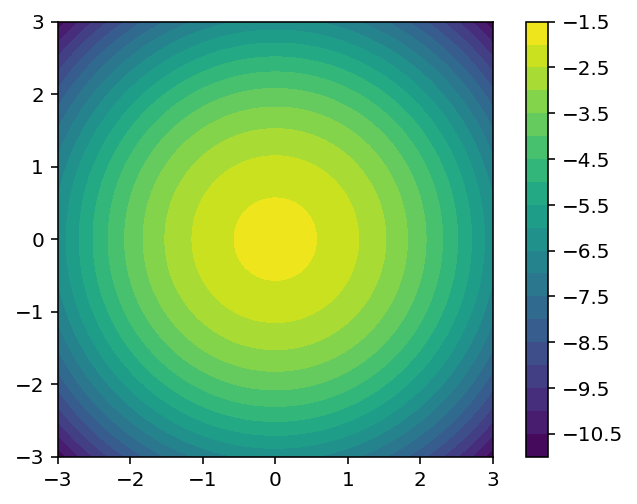

In [16]:
# Plot the prior in 2d contour

theta1 = torch.linspace(-3, 3, 100)
theta2 = torch.linspace(-3, 3, 100)

theta1, theta2 = torch.meshgrid(theta1, theta2)

theta_values = torch.stack((theta1, theta2), dim=-1)  # Shape: (100, 100, 2)

z = theta.log_prob(theta_values.view(-1, 2))  # Shape: (10000,)
z = z.view(100, 100)  # Reshape to (100, 100)

plt.contourf(theta1.numpy(), theta2.numpy(), z.numpy(), 20)
plt.gca().set_aspect('equal')

plt.colorbar()


In [23]:
theta_sample = theta.sample((1000,))
theta_sample

tensor([[-1.2069,  1.0998],
        [-0.5060,  0.8345],
        [ 0.8165,  0.9743],
        ...,
        [-0.4788,  0.4408],
        [-0.5973, -0.7947],
        [ 0.7331, -0.8806]])

In [37]:
x_lin = torch.linspace(-1, 1, 100)
y_lin = theta_sample[:, 0].unsqueeze(1) + theta_sample[:, 1].unsqueeze(1) * x_lin.unsqueeze(0)

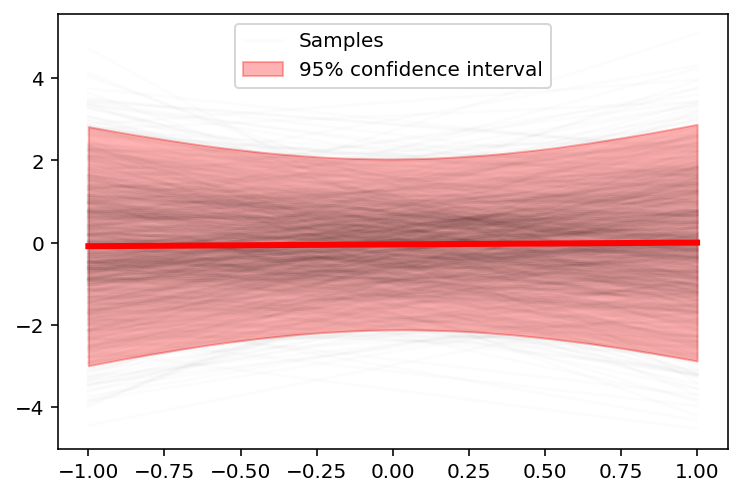

In [48]:
_ = plt.plot(x_lin.numpy(), y_lin.numpy().T, alpha=0.01, color='black')

# Plot the last sample to see the line and mark the label
_ = plt.plot(x_lin.numpy(), y_lin.numpy()[-1], alpha=0.01, color='black', label='Samples')

# Mean prediction
y_pred_mean = y_lin.mean(dim=0)
plt.plot(x_lin.numpy(), y_pred_mean.numpy(), color='red', linewidth=3)

# 95% confidence interval
y_pred_std = y_lin.std(dim=0)
plt.fill_between(x_lin.numpy(), (y_pred_mean - 2 * y_pred_std).numpy(), (y_pred_mean + 2 * y_pred_std).numpy(), alpha=0.3, color='red', label='95% confidence interval')

plt.legend()


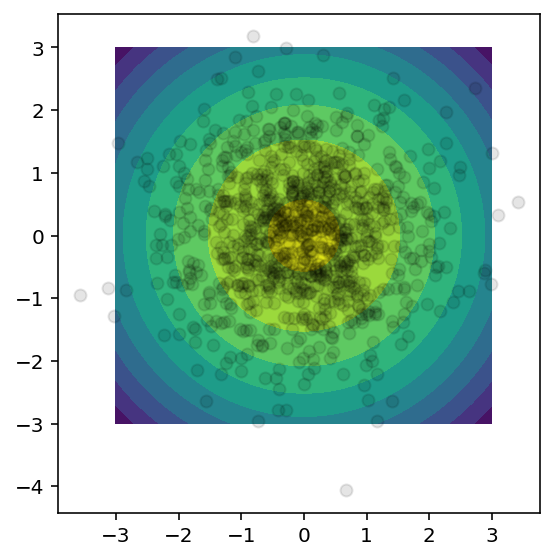

In [56]:
# Plot the theta samples on the contour plot as scatter points

plt.contourf(theta1.numpy(), theta2.numpy(), z.numpy(), 10)
plt.gca().set_aspect('equal')


plt.scatter(theta_sample[:, 0].numpy(), theta_sample[:, 1].numpy(), alpha=0.1, color='black')
plt.tight_layout()

# Closed form solution for prior predictive distribution

![CleanShot 2023-06-05 at 17.47.27@2x.png](<attachment:CleanShot 2023-06-05 at 17.47.27@2x.png>)
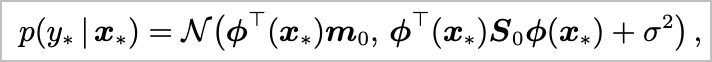

In [ ]:
sigma = 1.0

def prior_predictive(x, sigma, prior_mean, prior_cov):
    """Closed form prior predictive distribution for linear regression."""
    prior_pred_mean = prior_mean[0] + prior_mean[1] * x
    prior_pred_cov = sigma ** 2 + x ** 2 * prior_cov[1, 1]
    return prior_pred_mean, prior_pred_cov